# Machine Learning and Artificial Intelligence Research
### GAS LEAK PROJECT: 

## Table of contents
* [Introduction](#introduction_gas)
  * [Background / Problem](#background_problem_gas)
* [Data](#data_gas)
  * [Import the Data](#pulldata_gas)
  * [Exploration (Missing Values, Data Dispersion, Data Types)](#evaluate_gas)
  * [Visualizations](#visual_barh_gas)
    * [Correlation Matrix](#corr_matrix_gas) 
    * [Review Dataset Balance](#data_balance_gas)     
  * [Data Processing and Preparation](#dataprep_gas)
  * [Set Classification Target Values](#setclasstarget_gas)
  * [Perform One Hot Encoding](#onehot_gas)
  * [Scale / Normalize (for continuous features)](#normalize_gas)
  * [Set Train / Test Splits](#train_test_gas)
* [Methodology - Supervised Learning: Classification](#method_class_gas)
  * [Random Forest](#randomforest_gas)
  * [Logistic Regression](#lr_gas)
  * [Gaussian Naive Bayes](#naive_bayes_gas)
  * [Gradient Boosting](#gradient_boosting_)
  * [Multi-Layer Perceptron](#multi_layer_gas)
* [Model Comparison](#mod_comp_gas)
* [Conclusion](#conclusion_gas)



## Introduction <a name="introduction_gas"></a>

### Background / Problem <a name="background_problem_gas"></a>
Detection of minor leaks in oil or gas pipelines is a critical and persistent problem in the oil
and gas industry. Many organizations have long relied on fixed hardware or manual assessments to
monitor leaks. Machine learning-based anomaly detection models are proposed to solve the problem of oil and gas pipeline
leakage. Five machine learning algorithms, namely, Random Forest, Logistic Regression, Gaussian Naive Bayes, Gradient Boosting, and Multi-Layer Perceptron were used to develop detection models for pipeline leaks.

### Data Description


In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from collections import defaultdict

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines

## Data <a name="data_gas"></a>

### Import the Data <a name="pulldata_gas"></a>
An open-source dataset obtained from GitHub was used in this project. The
dataset was proposed for public use for studies such as ML and other statistical studies.
It was originally proposed with a regression target class of the corrosion defect.

|	Feature	|	Description	|
| -----	| -----	|
|	Wellhead temp. (°C) 	|	The temperature of the wellhead	|
|	Wellhead press (psi) 	|	The pressure of the wellhead	|
|	MMCFD gas 	|	Million standard cubic feet per day of gas	|
|	BOPD 	|	Barrel of oil produced per day	|
|	BWPD 	|	Barrel of water produced per day	|
|	BSW 	|	Basic solid and water	|
|	CO2 mol. 	|	Molecular mass of CO2	|
|	Gas Grav. 	|	Gas gravity	|

In [8]:
dataset = pd.read_csv(r'generated_dataset.csv')

In [9]:
dataset.head()

Wellhead Temp. (C)  Wellhead Press (psi)  MMCFD- gas  \
0               53.35               1105.13       12.87   
1               72.25               1026.31        3.42   
2               65.08                722.96        6.23   
3               60.71               1557.23       11.71   
4               46.19               1304.42        8.58   

   BOPD (barrel of oil produced per day)  \
0                                1378.93   
1                                1028.75   
2                                2017.92   
3                                 558.22   
4                                1280.47   

   BWPD (barrel of water produced per day)  BSW - basic solid and water (%)  \
0                                  2812.62                            75.64   
1                                   919.92                            44.21   
2                                  1212.42                            17.55   
3                                  1716.09                            65.79   
4                                  1929.22                            37.45   

   CO2 mol. (%) @ 25 C & 1 Atm.  Gas Grav.  CR-corrosion defect  
0                        3.3628     0.7205               0.2245  
1                        3.8679     0.8940               0.2262  
2                        2.3552     0.7661               0.2305  
3                        1.7253     0.7738               0.2303  
4                        1.8327     0.7611               0.2202

In [11]:
dataset.shape

(10292, 9)

### Exploration (Missing Values, Data Dispersion, Data Types) <a name="evaluate_gas"></a>

The train set will be used to train the model and test set for testing the model on unseen data.

### Set Classification Target Values <a name="setclasstarget_gas"></a>

Our aim here is to check whether an intrusion is detected or not. We do not go deeper into the classification of the attacks. Thus, we add a 'target' column which maps label 'normal' to 0 and any intrusion as 1.

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10292 entries, 0 to 10291
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Wellhead Temp. (C)                       10292 non-null  float64
 1   Wellhead Press (psi)                     10292 non-null  float64
 2   MMCFD- gas                               10292 non-null  float64
 3   BOPD (barrel of oil produced per day)    10292 non-null  float64
 4   BWPD (barrel of water produced per day)  10292 non-null  float64
 5   BSW - basic solid and water (%)          10292 non-null  float64
 6   CO2 mol. (%) @ 25 C & 1 Atm.             10292 non-null  float64
 7   Gas Grav.                                10292 non-null  float64
 8   CR-corrosion defect                      10292 non-null  float64
dtypes: float64(9)
memory usage: 723.8 KB


In [15]:
dataset.describe()

Wellhead Temp. (C)  Wellhead Press (psi)    MMCFD- gas  \
count        10292.000000          10292.000000  10292.000000   
mean            57.352401           1361.783583      8.851533   
std              9.423529            559.275420      4.968737   
min             41.070000            382.080000      0.230000   
25%             49.220000            880.000000      4.570000   
50%             57.360000           1364.900000      8.880000   
75%             65.412500           1848.252500     13.090000   
max             73.870000           2317.230000     17.540000   

       BOPD (barrel of oil produced per day)  \
count                           10292.000000   
mean                             1103.563396   
std                               565.392744   
min                               129.470000   
25%                               611.645000   
50%                              1106.085000   
75%                              1589.710000   
max                              2087.430000   

       BWPD (barrel of water produced per day)  \
count                             10292.000000   
mean                               4636.556014   
std                                2685.799834   
min                                  40.610000   
25%                                2295.520000   
50%                                4591.995000   
75%                                6997.442500   
max                                9314.260000   

       BSW - basic solid and water (%)  CO2 mol. (%) @ 25 C & 1 Atm.  \
count                     10292.000000                  10292.000000   
mean                         44.876740                      2.502574   
std                          25.710558                      1.041002   
min                           0.130000                      0.678600   
25%                          22.887500                      1.608650   
50%                          45.075000                      2.518100   
75%                          67.212500                      3.406125   
max                          89.260000                      4.298200   

          Gas Grav.  CR-corrosion defect  
count  10292.000000         10292.000000  
mean       0.821436             0.211285  
std        0.063142             0.037283  
min        0.711100             0.000900  
25%        0.766800             0.192100  
50%        0.821600             0.213500  
75%        0.876300             0.232800  
max        0.931900             0.405200

In [16]:
# Check for missing values
dataset.isnull().sum()

Wellhead Temp. (C)                         0
Wellhead Press (psi)                       0
MMCFD- gas                                 0
BOPD (barrel of oil produced per day)      0
BWPD (barrel of water produced per day)    0
BSW - basic solid and water (%)            0
CO2 mol. (%) @ 25 C & 1 Atm.               0
Gas Grav.                                  0
CR-corrosion defect                        0
dtype: int64

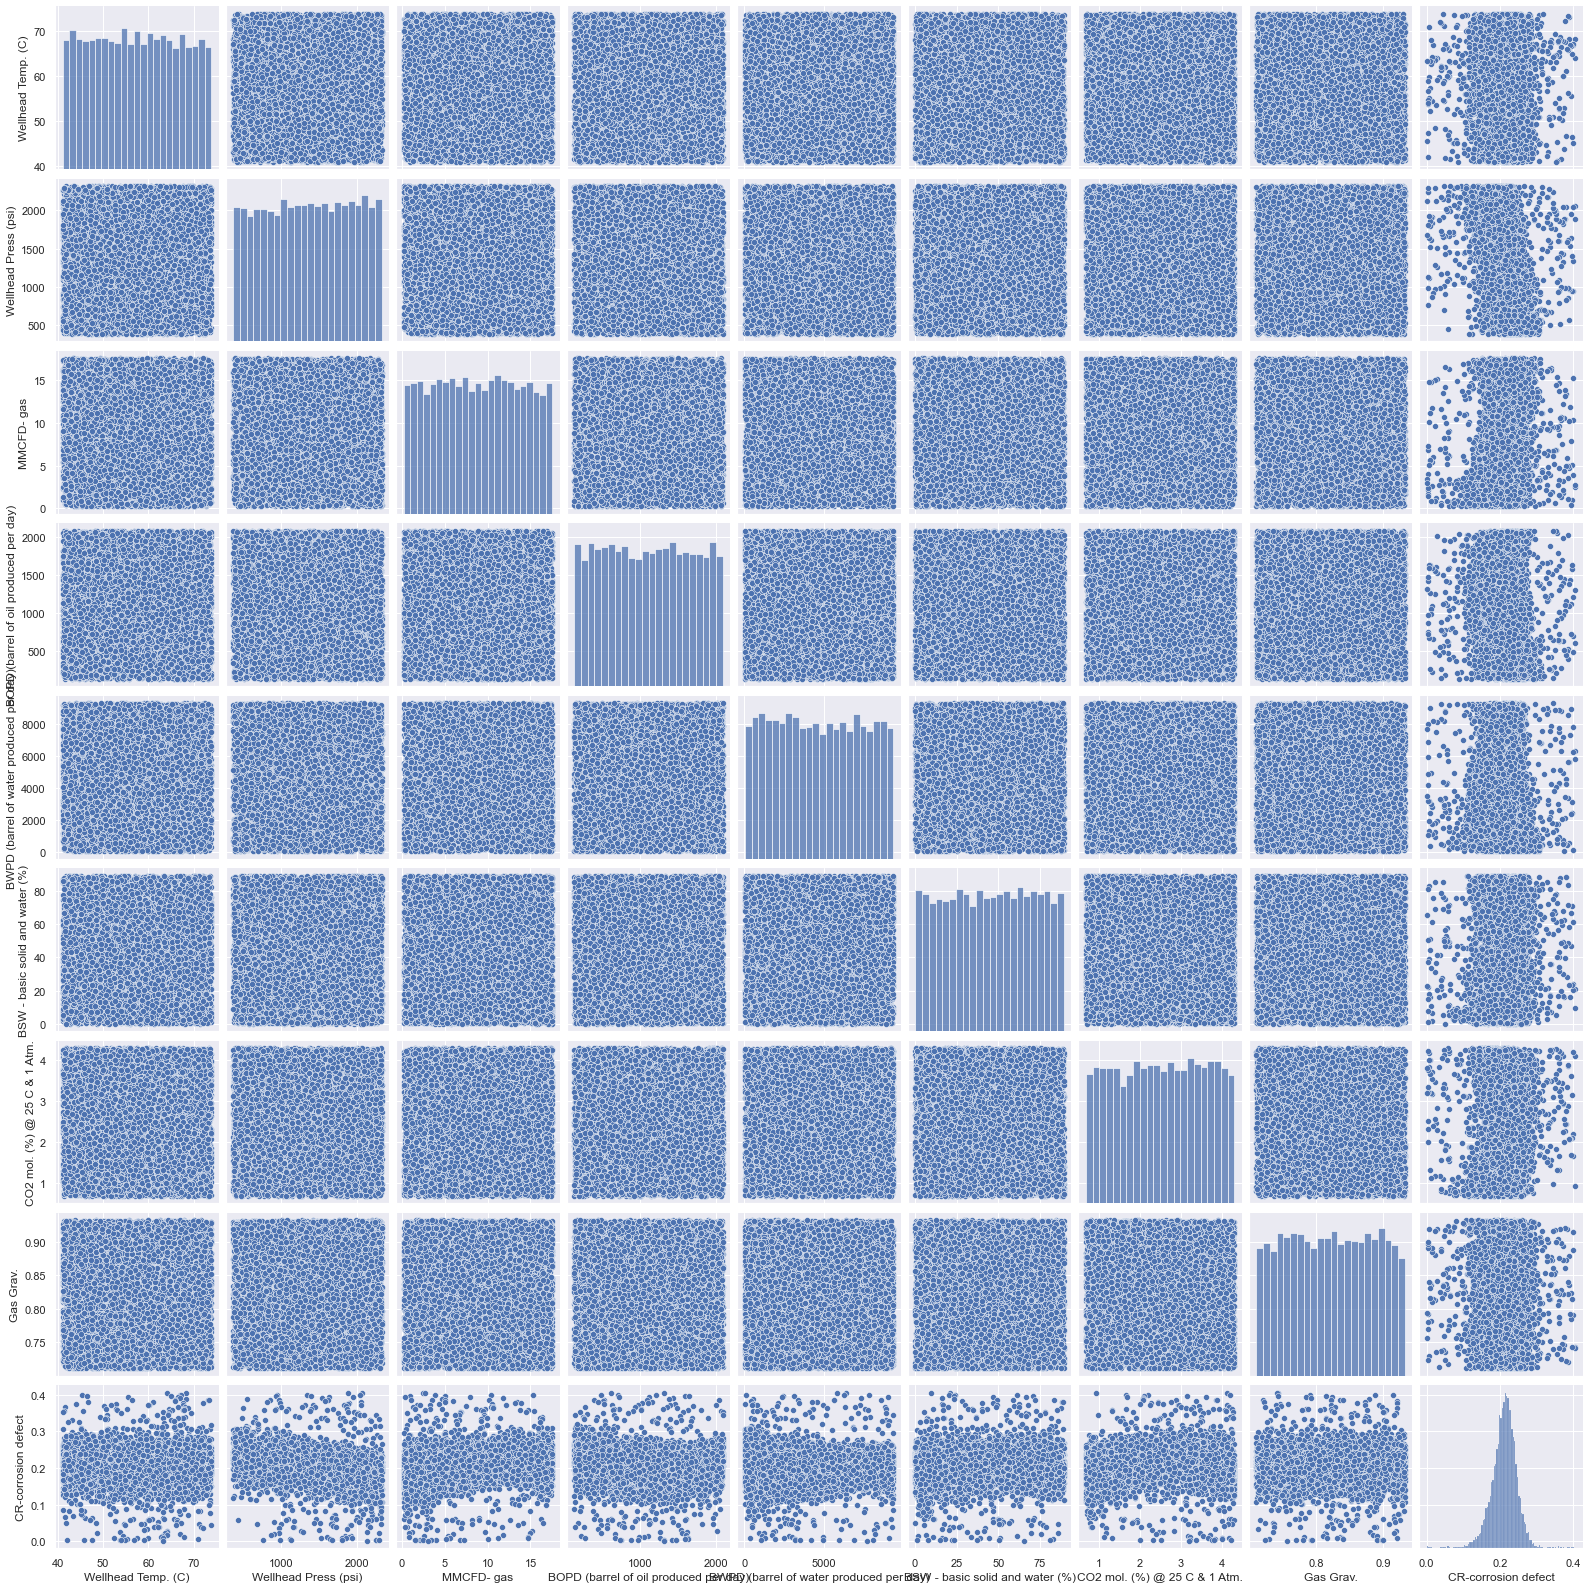

In [34]:
sns.pairplot(dataset, height=2.5)

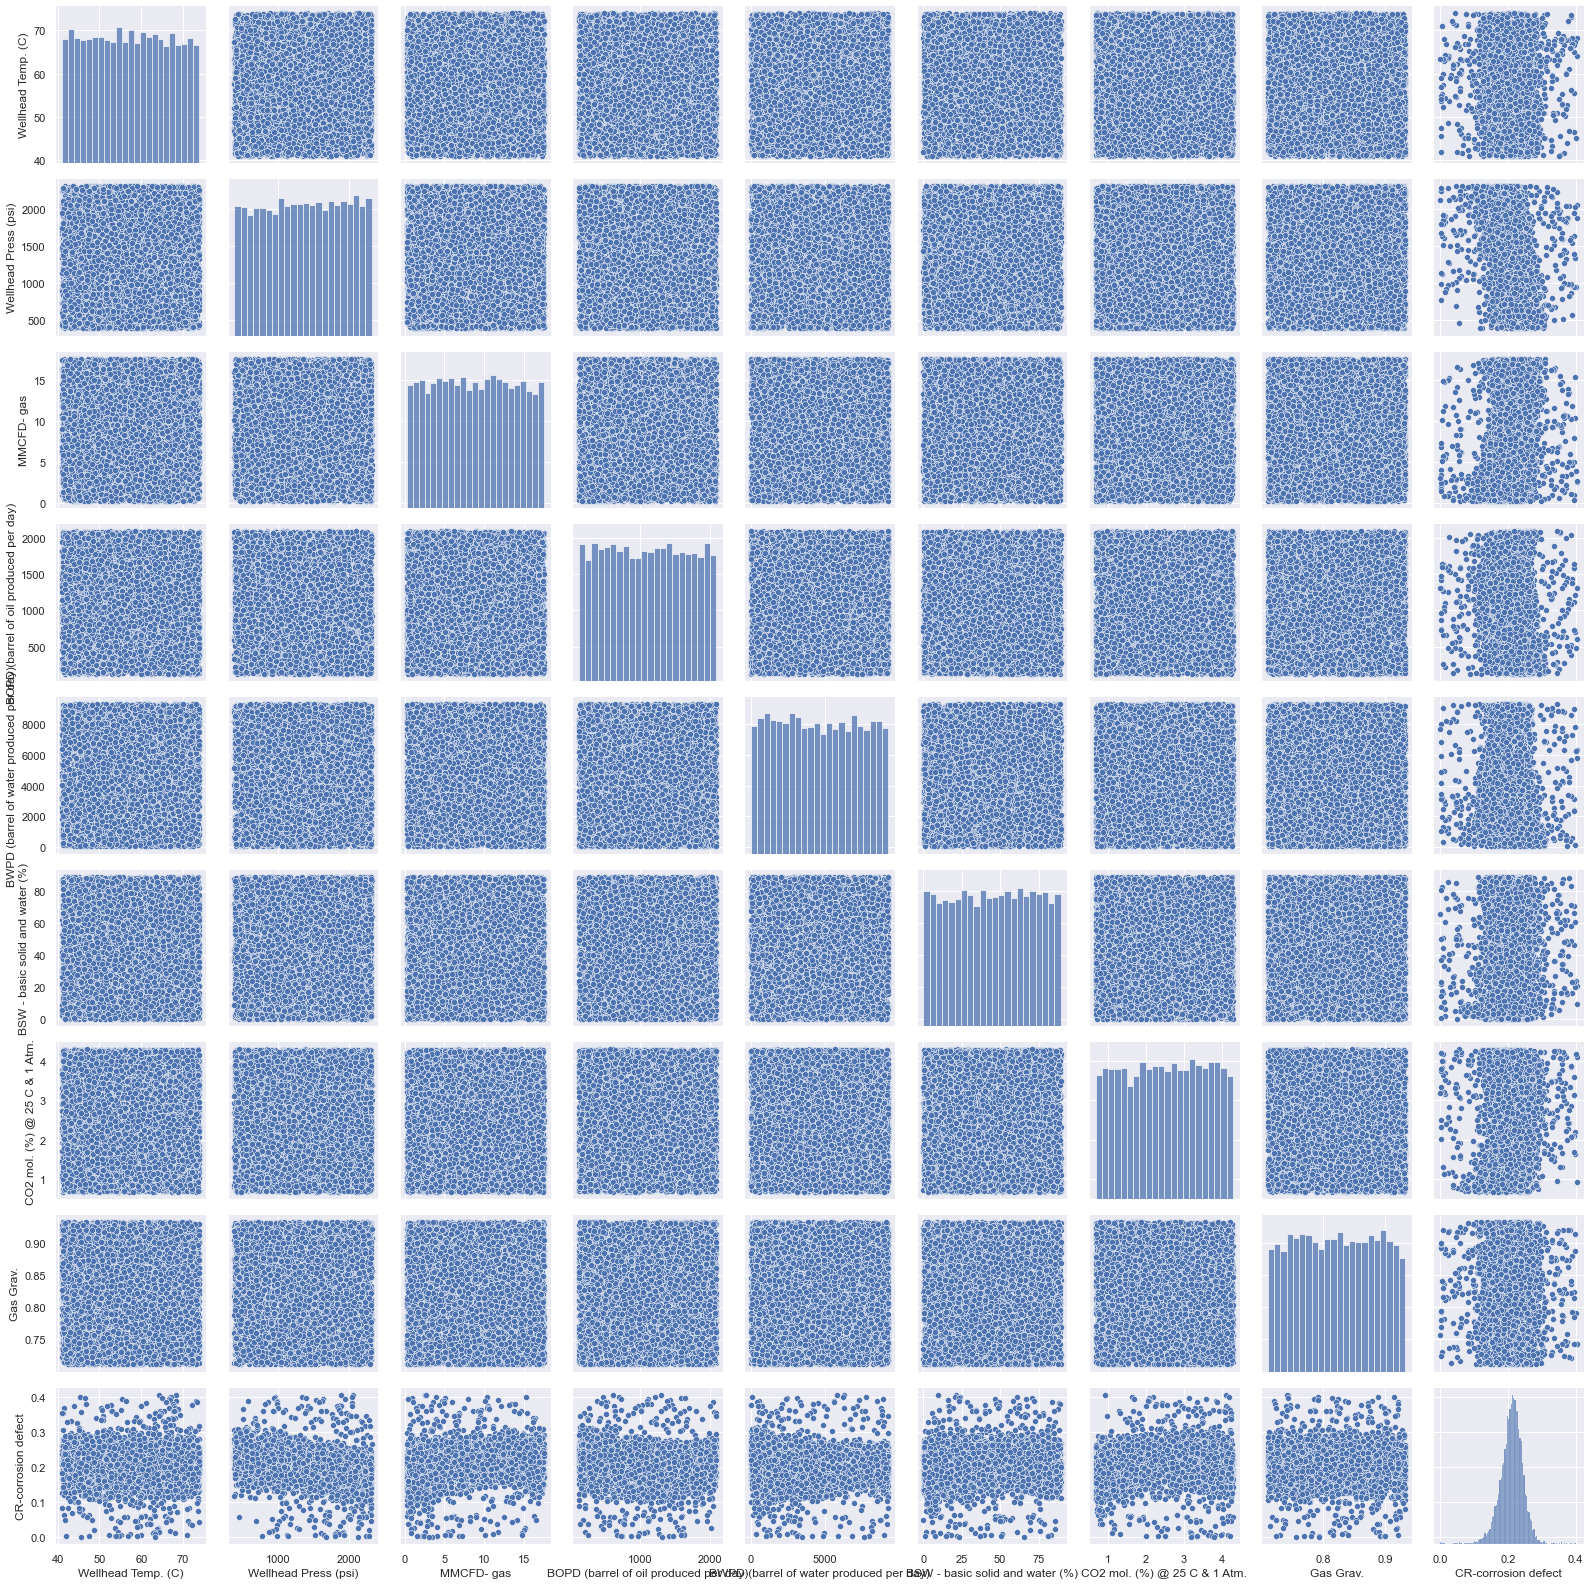

In [35]:
g = sns.PairGrid(dataset)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [61]:
import seaborn as sns
corrmat = dataset.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(32,32)) # this figure was too small
plt.rcParams["figure.figsize"] = (16,11)
# plt.figure()

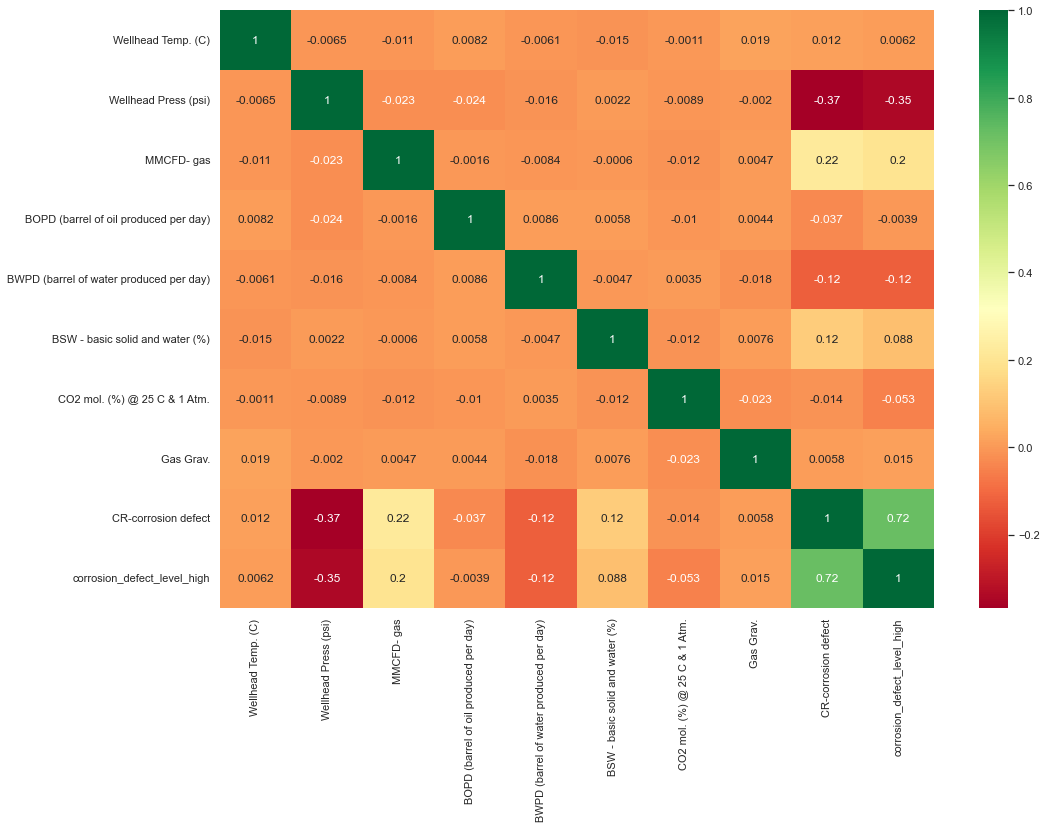

In [62]:
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

### Set Classification Target Values <a name="setclasstarget_gas"></a>
For this analysis, CR-corrosion defect values less than or equal to the mean of 0.211 were treated as ‘low’, while values
greater than 0.211 were treated as ‘high’.

In [51]:
corrosion_defect_mean = round(dataset['CR-corrosion defect'].mean(),3)

In [52]:
corrosion_defect_mean

0.211

In [53]:
dataset.loc[dataset['CR-corrosion defect'] >= corrosion_defect_mean, ['corrosion_defect_level_high']] = 1

In [54]:
dataset.loc[dataset['CR-corrosion defect'] < corrosion_defect_mean, ['corrosion_defect_level_high']] = 0

In [55]:
dataset['corrosion_defect_level_high'].values

array([1., 1., 1., ..., 0., 0., 0.])

In [59]:
dataset['corrosion_defect_level_high'] = dataset['corrosion_defect_level_high'].astype('int32')

In [60]:
dataset['corrosion_defect_level_high'].dtype

dtype('int32')

In [25]:
column_list = ['Wellhead Press (psi)',
'MMCFD- gas',
'BOPD (barrel of oil produced per day)',
'BWPD (barrel of water produced per day)',
'BSW - basic solid and water (%)',
'CO2 mol. (%) @ 25 C & 1 Atm.',
'Gas Grav.',
'CR-corrosion defect']

In [36]:
# pd.plotting.scatter_matrix(dataset, alpha=0.2, figsize=(50, 15))

In [63]:
y = dataset['corrosion_defect_level_high']
X = dataset.drop(['corrosion_defect_level_high'], axis = 1)
X_scaled = dataset.drop(['corrosion_defect_level_high'], axis = 1)
indices = X.index

Now, it's time to scale the data. Use MinMaxScaler on StandardScaler if you want the scaling operation to keep the small standard deviations of the original series or if you want to keep zero entries in the sparse data. 

Outliers in your data can seriously and negatively skew the results of standard scaling and normalization. If the data contains outliers, sklearn.preprocessing.RobustScaler will be more suitable. RobustScaler uses robust estimates such as median and quartile ranges, so it won’t be affected as much by outliers

### Scale / Normalize (for continuous features) <a name="scale_normalize_gas"></a>

In [64]:
# normalize data (except onehot encoding)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_scaled = standardScaler.fit_transform(X_scaled)

### Set Train / Test Splits <a name="train_test_gas"></a>

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X_scaled, y, indices, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Train set (indices):', indices_train)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Test set (indices): ', indices_test)

Train set: (7204, 9) (7204,)
Train set (indices): Int64Index([9318, 1632, 1342, 6839, 4130, 9694, 4112,  877, 6903,  787,
            ...
            7844, 3678, 8039, 9274, 6962,  456, 6017,  709, 8366, 1146],
           dtype='int64', length=7204)
Test set: (3088, 9) (3088,)
Test set (indices):  Int64Index([7609, 9716, 9422, 4696, 9102, 2946, 8661, 2691, 7179, 7882,
            ...
            7931, 4119, 9337, 5287, 2742,  418, 2329, 3136, 9024, 2970],
           dtype='int64', length=3088)


## Methodology - Supervised Learning: Classification <a name="method_class_gas"></a>

We will utilize the following models in an attempt to solve our intrusion detection classification problem.

* Random Forest
* Support Vector Machines
* Logistic Regression
* Gaussian Naive Bayes
* Gradient Boosting
* Multi-Layer Perceptron

### Random Forest <a name="randomforest_gas"></a>

The Random Forest model, an ensemble technique, conquers the bias and overfitting issues that plague Decision Tree classifiers used singly. Random forests overcome this using a voting system comprised of its forest of multiple "weaker" decision trees, each fit on a random subset of data. The aggregated output is the final classification.

In [66]:
# from sklearn.ensemble import RandomForestClassifier

mod_rf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state= 10, verbose= 1)
mod_rf.fit(X_train, y_train)

print("Train score: ",mod_rf.score(X_train, y_train))

pred_rf = mod_rf.predict(X_test)
print('Test score:',mod_rf.score(X_test, y_test))

print("Classification report: ",classification_report(pred_rf,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_rf))
print("Average weighted recall: ",recall_score(y_test,pred_rf))
print("Average weighted f1 score: ",f1_score(y_test,pred_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score:  1.0
Test score: 1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1465
           1       1.00      1.00      1.00      1623

    accuracy                           1.00      3088
   macro avg       1.00      1.00      1.00      3088
weighted avg       1.00      1.00      1.00      3088

Average weighted precision:  1.0
Average weighted recall:  1.0
Average weighted f1 score:  1.0


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [67]:
from sklearn.model_selection import cross_val_score


In [68]:
# from sklearn.ensemble import RandomForestClassifier
# randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
# score=cross_val_score(model_rf,X,y,cv=10)
# score.mean()

In [69]:
# score

### Support Vector Machines <a name="svm_gas"></a>

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [70]:
# sklearn.svm.SVC takes long time to run...skip for now
# maybe try linear support vector classification...docs say svc takes too long when >10k+ samples 
# try alternative svm models sklearn.svm.SVR, 
# sklearn.svm.NuSVC # slow as well
# sklearn.svm.SVR slow as well
# sklearn.svm.NuSVR - no probability
"""
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import SVR
# from sklearn.svm import NuSVR # no probability

# from sklearn.svm import LinearSVC

# mod_svm = SVC(kernel='linear', probability=True)
# mod_svm = LinearSVC() # DOESN'T HAVE PRED_PROB
# mod_svm = NuSVC(kernel='linear', probability=True)
# mod_svm = SVR(kernel='linear', probability=True)
mod_svm = NuSVR(kernel='linear', probability=True)

mod_svm.fit(X_train, y_train)

print("Train score: ",mod_svm.score(X_train, y_train))

pred_svm = mod_svm.predict(X_test)
print('Test score:',mod_svm.score(X_test, y_test))

print("Classification report: ",classification_report(pred_svm,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_svm))
print("Average weighted recall: ",recall_score(y_test,pred_svm))
print("Average weighted f1 score: ",f1_score(y_test,pred_svm))
"""

'\nfrom sklearn.svm import SVC\nfrom sklearn.svm import NuSVC\nfrom sklearn.svm import SVR\n# from sklearn.svm import NuSVR # no probability\n\n# from sklearn.svm import LinearSVC\n\n# mod_svm = SVC(kernel=\'linear\', probability=True)\n# mod_svm = LinearSVC() # DOESN\'T HAVE PRED_PROB\n# mod_svm = NuSVC(kernel=\'linear\', probability=True)\n# mod_svm = SVR(kernel=\'linear\', probability=True)\nmod_svm = NuSVR(kernel=\'linear\', probability=True)\n\nmod_svm.fit(X_train, y_train)\n\nprint("Train score: ",mod_svm.score(X_train, y_train))\n\npred_svm = mod_svm.predict(X_test)\nprint(\'Test score:\',mod_svm.score(X_test, y_test))\n\nprint("Classification report: ",classification_report(pred_svm,y_test))\n\nprint("Average weighted precision: ",precision_score(y_test,pred_svm))\nprint("Average weighted recall: ",recall_score(y_test,pred_svm))\nprint("Average weighted f1 score: ",f1_score(y_test,pred_svm))\n'

### Logistic Regression <a name="lr_gas"></a>

Logistic Regression classifcation is a variation of Linear Regression, and is useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables. It does this by transforming the linear regression using the s-shaped sigmoid function 𝜎. The resulting classifier outputs are between 0 and 1 (binary outcomes like yes or no, true or false); values larger than 0.5 result in the classifier setting outputs to 1 with the remaining values set to 0.

In [71]:
# from sklearn.linear_model import LogisticRegression

mod_lr = LogisticRegression(solver='liblinear') #adding liblinear solved AttributeError: 'str' object has no attribute 'decode'
mod_lr.fit(X_train, y_train)

print("Train score: ",mod_lr.score(X_train, y_train))

pred_lr = mod_lr.predict(X_test)
print('Test score:',mod_lr.score(X_test, y_test))

print("Classification report: ",classification_report(pred_lr,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_lr))
print("Average weighted recall: ",recall_score(y_test,pred_lr))
print("Average weighted f1 score: ",f1_score(y_test,pred_lr))

Train score:  0.9983342587451416
Test score: 0.9977331606217616
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1460
           1       1.00      1.00      1.00      1628

    accuracy                           1.00      3088
   macro avg       1.00      1.00      1.00      3088
weighted avg       1.00      1.00      1.00      3088

Average weighted precision:  0.9963144963144963
Average weighted recall:  0.9993838570548367
Average weighted f1 score:  0.9978468163641957


### Gaussian Naive Bayes <a name="naive_bayes_gas"></a>

Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes' theorem. It is a simple classification technique, but has high functionality. They find use when the dimensionality of the inputs is high. Complex classification problems can also be implemented by using Naive Bayes Classifier. Naive refers to the use of an assumption that the features of an object are independent of one another.

In [72]:
# from sklearn.naive_bayes import GaussianNB

mod_gnb = GaussianNB()
mod_gnb.fit(X_train, y_train)

print("Train score: ",mod_gnb.score(X_train, y_train))

pred_nb = mod_gnb.predict(X_test)
print('Test score:',mod_gnb.score(X_test, y_test))

print("Classification report: ",classification_report(pred_nb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_nb))
print("Average weighted recall: ",recall_score(y_test,pred_nb))
print("Average weighted f1 score: ",f1_score(y_test,pred_nb))

Train score:  0.9267073847862298
Test score: 0.9242227979274611
Classification report:                precision    recall  f1-score   support

           0       0.91      0.93      0.92      1437
           1       0.94      0.92      0.93      1651

    accuracy                           0.92      3088
   macro avg       0.92      0.92      0.92      3088
weighted avg       0.92      0.92      0.92      3088

Average weighted precision:  0.9206541490006057
Average weighted recall:  0.9365372766481824
Average weighted f1 score:  0.9285277947464875


### Gradient Boosting <a name="gradient_boosting_gas"></a>

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.
https://en.wikipedia.org/wiki/Gradient_boosting

In [73]:
# from sklearn.ensemble import GradientBoostingClassifier

mod_gb = GradientBoostingClassifier(n_estimators=200, random_state= 10)
mod_gb.fit(X_train, y_train)

print("Train score: ",mod_gb.score(X_train, y_train))

pred_gb = mod_gb.predict(X_test)
print('Test score:',mod_gb.score(X_test, y_test))

print("Classification report: ",classification_report(pred_gb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_gb))
print("Average weighted recall: ",recall_score(y_test,pred_gb))
print("Average weighted f1 score: ",f1_score(y_test,pred_gb))

Train score:  1.0
Test score: 1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1465
           1       1.00      1.00      1.00      1623

    accuracy                           1.00      3088
   macro avg       1.00      1.00      1.00      3088
weighted avg       1.00      1.00      1.00      3088

Average weighted precision:  1.0
Average weighted recall:  1.0
Average weighted f1 score:  1.0


### Multi-Layer Perceptron <a name="multi_layer_gas"></a>

A multilayer perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation).

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. MLP utilizes a supervised learning technique called backpropagation for training. It can distinguish data that is not linearly separable.

https://en.wikipedia.org/wiki/Multilayer_perceptron

In [74]:
# from sklearn.neural_network import MLPClassifier

mod_mlp = MLPClassifier(hidden_layer_sizes=[100,50])
mod_mlp.fit(X_train, y_train)

print("Train score: ",mod_mlp.score(X_train, y_train))

pred_mlp = mod_mlp.predict(X_test)
print('Test score:',mod_mlp.score(X_test, y_test))

print("Classification report: ",classification_report(pred_mlp,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_mlp))
print("Average weighted recall: ",recall_score(y_test,pred_mlp))
print("Average weighted f1 score: ",f1_score(y_test,pred_mlp))

Train score:  1.0
Test score: 0.9954663212435233
Classification report:                precision    recall  f1-score   support

           0       1.00      0.99      1.00      1471
           1       0.99      1.00      1.00      1617

    accuracy                           1.00      3088
   macro avg       1.00      1.00      1.00      3088
weighted avg       1.00      1.00      1.00      3088

Average weighted precision:  0.9975262832405689
Average weighted recall:  0.9938385705483672
Average weighted f1 score:  0.9956790123456789


## Model Comparison <a name="mod_comp_gas"></a>

No Skill AUC:  0.5
RandomForest AUC:  1.0
Logistic Regression AUC:  0.9999835975598217
Gaussian Naive Bayes AUC:  0.9820725534603891
GradientBoosting AUC:  1.0
MultiLayer Perceptron AUC:  0.9999205112514431


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


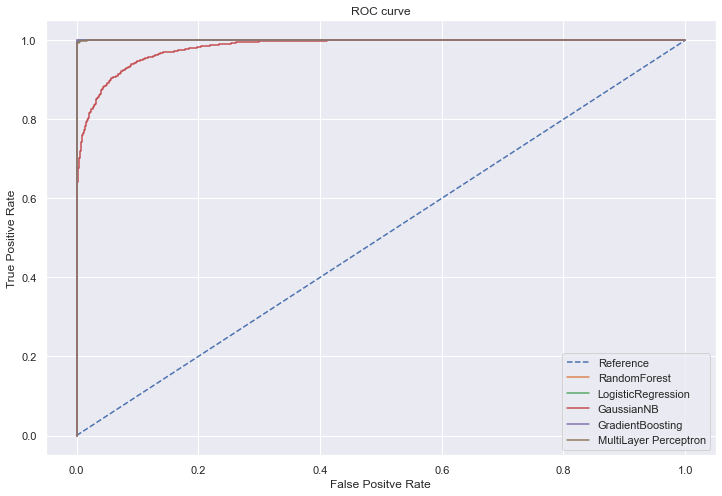

In [75]:
no_skill_prob = [0 for _ in range(len(y_test))]
no_skill_auc = roc_auc_score(y_test, no_skill_prob)
print("No Skill AUC: ", no_skill_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_prob)

prob_rf = mod_rf.predict_proba(X_test)[:,-1]
auc_rf = roc_auc_score(y_test,prob_rf)
print("RandomForest AUC: ", auc_rf)
rf_fpr, rf_tpr, _ = roc_curve(y_test, prob_rf)

# prob_svm = mod_svm.predict_proba(X_test)[:,-1]
# auc_svm = roc_auc_score(y_test, prob_svm)
# print("Support Vector Machine AUC: ", auc_svm)
# svm_fpr, svm_tpr, _ = roc_curve(y_test, prob_svm)

prob_lr = mod_lr.predict_proba(X_test)[:,-1]
auc_lr = roc_auc_score(y_test, prob_lr)
print("Logistic Regression AUC: ",auc_lr)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_lr)

prob_nb = mod_gnb.predict_proba(X_test)[:,-1]
auc_nb = roc_auc_score(y_test, prob_nb)
print("Gaussian Naive Bayes AUC: ", auc_nb)
nb_fpr, nb_tpr, _ = roc_curve(y_test, prob_nb)

prob_gb = mod_gb.predict_proba(X_test)[:,-1]
auc_gb = roc_auc_score(y_test, prob_gb)
print("GradientBoosting AUC: ", auc_gb)
gb_fpr, gb_tpr, _ = roc_curve(y_test, prob_gb)

prob_mlp = mod_mlp.predict_proba(X_test)[:,-1]
auc_mlp = roc_auc_score(y_test, prob_mlp)
print("MultiLayer Perceptron AUC: ", auc_mlp)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, prob_mlp)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(ns_fpr, ns_tpr, linestyle= '--', label= 'Reference')
ax.plot(rf_fpr, rf_tpr, linestyle= '-', label= 'RandomForest')
# ax.plot(svm_fpr, svm_tpr, linestyle= '-', label= 'SupportVectorMachine')
ax.plot(lr_fpr, lr_tpr, linestyle='-', label= 'LogisticRegression')
ax.plot(nb_fpr, nb_tpr, linestyle='-', label= 'GaussianNB')
ax.plot(gb_fpr, gb_tpr, linestyle='-', label= 'GradientBoosting')
ax.plot(mlp_fpr, mlp_tpr, linestyle='-', label= 'MultiLayer Perceptron')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
ax.legend(loc="lower right")

The below plot is a zoomed in version of the previous ROC plot in order to better examine the performance differnces of the models.

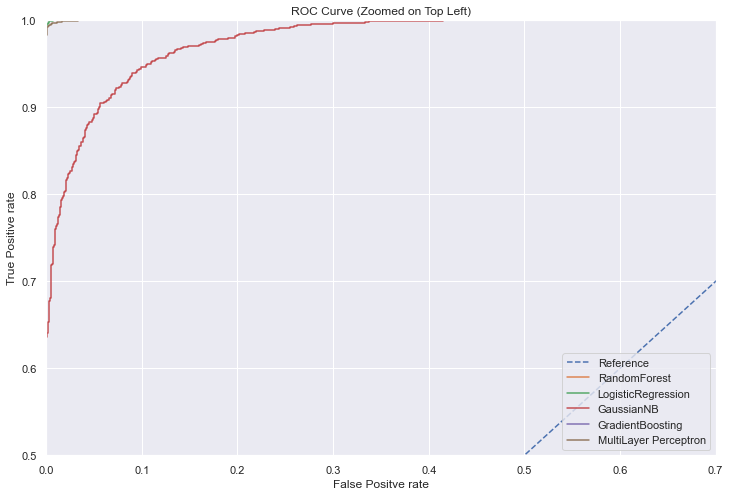

In [76]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(ns_fpr, ns_tpr, linestyle= '--', label= 'Reference')
ax.plot(rf_fpr, rf_tpr, linestyle= '-', label= 'RandomForest')
# ax.plot(svm_fpr, svm_tpr, linestyle= '-', label= 'SupportVectorMachine')
ax.plot(lr_fpr, lr_tpr, linestyle='-', label= 'LogisticRegression')
ax.plot(nb_fpr, nb_tpr, linestyle='-', label= 'GaussianNB')
ax.plot(gb_fpr, gb_tpr, linestyle='-', label= 'GradientBoosting')
ax.plot(mlp_fpr, mlp_tpr, linestyle='-', label= 'MultiLayer Perceptron')
plt.xlabel('False Positve rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve (Zoomed on Top Left)')
plt.xlim([0,0.7])
plt.ylim([0.5,1])
ax.legend(loc="lower right")

A reliability diagram is a line plot of the relative frequency of what was observed (y-axis) versus the predicted probability frequency (x-axis). The predicted probabilites are divided into fixed number of buckets (bins). The more reliable predictions are, the closer they are to being on the line y=x.

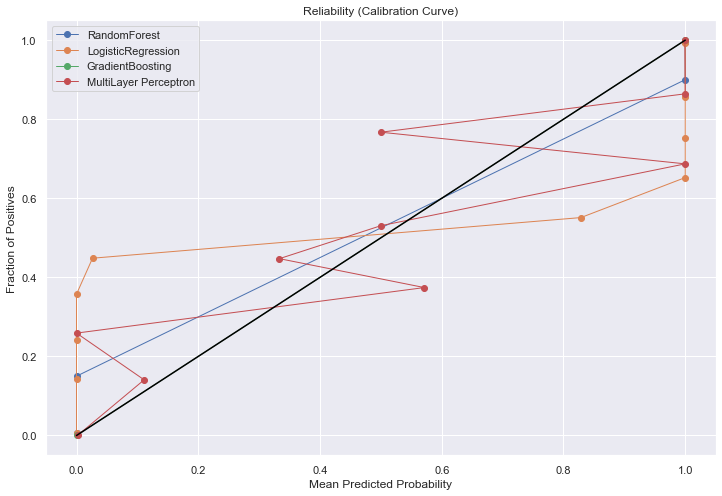

In [77]:
rf_x, rf_y = calibration_curve(y_test, prob_rf, n_bins=10)
# sv_x, sv_y = calibration_curve(y_test, prob_svm, n_bins=10)
lr_x, lr_y = calibration_curve(y_test, prob_lr, n_bins=10)
nb_x, nb_y = calibration_curve(y_test, prob_nb, n_bins=10)
gb_x, gb_y = calibration_curve(y_test, prob_gb, n_bins=10)
mlp_x, mlp_y = calibration_curve(y_test, prob_mlp, n_bins=10)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(rf_x, rf_y, marker= 'o', linewidth= '1', label= 'RandomForest')
# ax.plot(sv_x, sv_y, marker= 'o', linewidth= '1', label= 'SupportVector Machine')
ax.plot(lr_x, lr_y, marker= 'o', linewidth= '1', label= 'LogisticRegression')
# ax.plot(nb_x, nb_y, marker= 'o', linewidth= '1', label= 'GaussianNB')
ax.plot(gb_x, gb_y, marker= 'o', linewidth= '1', label= 'GradientBoosting')
ax.plot(mlp_x, mlp_y, marker= 'o', linewidth= '1', label= 'MultiLayer Perceptron')

line = mlines.Line2D([0,1],[0,1], color='black')
ax.add_line(line)
ax.legend()
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Reliability (Calibration Curve)')
plt.show()

Let's create a table that aggregates all the scores from each model.

In [78]:
models = {
    'Random Forest':mod_rf, 
    # 'Support Vector Machine': svm_mod,
    'Logistic Regression':mod_lr,
    'Gaussian Naive Bayes': mod_gnb,
    'Gradient Boosting':mod_gb,
    'Multi-Layer Perceptron':mod_mlp
}

columns = [
    'accuracy',
    'precision',
    'recall',
    'f1'
]

table = {}


for model in models.keys():
    
    pred = models[model].predict(X_test)
    accuracy = models[model].score(X_test,y_test)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    
    table[model] = [accuracy, precision, recall, f1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [79]:
results = pd.DataFrame.from_dict(table, orient='index')
results.columns = columns
results

accuracy  precision    recall        f1
Random Forest           1.000000   1.000000  1.000000  1.000000
Logistic Regression     0.997733   0.996314  0.999384  0.997847
Gaussian Naive Bayes    0.924223   0.920654  0.936537  0.928528
Gradient Boosting       1.000000   1.000000  1.000000  1.000000
Multi-Layer Perceptron  0.995466   0.997526  0.993839  0.995679

## Conclusion <a name="conclusion_gas"></a>

The ROC curve shows similar results for Random Forest and Gradient Boosting
However, the Reliability diagram (Calibration curve) shows that the Random Forest classifier more closely mimics the diagonal (y=x) line, which means its predictions are the most reliable.

In conclusion, in this instance, the Random Forest classifier outperforms all the models in detecting leaks in the pipeline.